In [7]:
#!pip install scikeras

In [8]:
#import pandas as pd
#import numpy as np
#import tensorflow as tf
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn import metrics
#from imblearn.over_sampling import ADASYN
#from google.colab import drive
#drive.mount('/content/drive/')
#import sys
#sys.path.append('/content/drive/MyDrive')
#from scikeras.wrappers import KerasClassifier
#
#from binary_load import binary_load_dataset
#
#from tensorflow.keras.models import Sequential
#from tensorflow import keras
#from tensorflow.keras import layers as Layer
#from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [9]:
import sys
sys.path.append('../')  # 상위 폴더(main_folder)의 경로를 추가

from binary_load import binary_load_dataset

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from imblearn.over_sampling import ADASYN
from scikeras.wrappers import KerasClassifier

from binary_load import binary_load_dataset

from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers as Layer
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [11]:
csv_loca = "../../../../data/Star.csv"
TEST_SIZE = 0.2
VAL_SIZE = 0.2
RANDOM_STATE = 42

In [12]:
def modelling(nodes1 = 8, nodes2= 6, nodes3 = 4, drop_rate= 0.2, activation= 'relu'):
  # 모델 만들기
  # 뉴런의 개수는 input과 output 사이의 숫자를 넣으라고 한다. --> 사용, 왜냐하면 시간이 적게 걸려서
  # 뉴런의 개수는 input의 2/3 정도 넣라고 한다.
  # 뉴런의 개수는 input의 두배보다는 적게 넣라고 한다.

  model = Sequential([Layer.Dense(12, input_shape=(8,))])
  model.add(Layer.Dense(nodes1, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes2, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes3, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(1, activation = 'sigmoid'))

  metrics = [
      TruePositives(name = 'tp'),
      TrueNegatives(name = 'tn'),
      FalsePositives(name = 'fp'),
      FalseNegatives(name = 'fn'),
      Recall(name = 'recall'),
      Precision(name = 'precision'),
      BinaryAccuracy(name = 'binary accuracy') # Binary Accuracy를 사용 안 하는 이유는 accuracy가 자동적으로 Binary Accuracy로 compile할 때 바꾸기 때문.
  ]

  model.compile(optimizer = 'adam',
                loss='binary_crossentropy',
                metrics = metrics)

  return model

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test, X_train_ad, X_val_ad, X_test_ad, y_train_ad, y_val_ad, y_test_ad  = binary_load_dataset(csv_loca, TEST_SIZE, VAL_SIZE, RANDOM_STATE)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11454, 8), (11454,), (2864, 8), (2864,), (3580, 8), (3580,))

In [14]:
X_train_ad.shape, y_train_ad.shape, X_val_ad.shape, y_val_ad.shape, X_test_ad.shape, y_test_ad.shape

((20711, 8), (20711,), (5178, 8), (5178,), (6473, 8), (6473,))

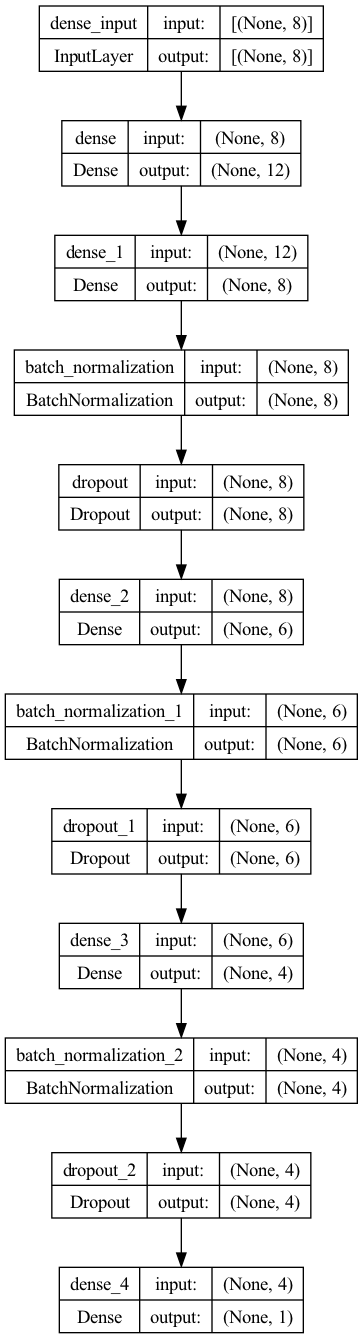

In [15]:
model = modelling()
keras.utils.plot_model(model, show_shapes=True)

In [16]:
model.fit(X_train, y_train, batch_size= 1000, epochs= 1000,  validation_data=(X_val, y_val))


model.evaluate(X_test, y_test, verbose=2)

Epoch 1/1000
12/12 [==============================] - 1s 17ms/step - loss: 0.8384 - tp: 760.0000 - tn: 3295.0000 - fp: 7110.0000 - fn: 289.0000 - recall: 0.7245 - precision: 0.0966 - binary accuracy: 0.3540 - val_loss: 0.5949 - val_tp: 0.0000e+00 - val_tn: 2602.0000 - val_fp: 0.0000e+00 - val_fn: 262.0000 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_binary accuracy: 0.9085
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.7890 - tp: 821.0000 - tn: 3572.0000 - fp: 6833.0000 - fn: 228.0000 - recall: 0.7827 - precision: 0.1073 - binary accuracy: 0.3835 - val_loss: 0.6040 - val_tp: 193.0000 - val_tn: 2530.0000 - val_fp: 72.0000 - val_fn: 69.0000 - val_recall: 0.7366 - val_precision: 0.7283 - val_binary accuracy: 0.9508
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.7452 - tp: 891.0000 - tn: 3835.0000 - fp: 6570.0000 - fn: 158.0000 - recall: 0.8494 - precision: 0.1194 - binary accuracy: 0.4126 - val_loss: 0.6163 - val_tp: 

[0.06696385145187378,
 267.0,
 3237.0,
 15.0,
 61.0,
 0.8140243887901306,
 0.9468085169792175,
 0.9787709712982178]

In [17]:
y_test_pred = model.predict(X_test)

y_test_pred = (y_test_pred > 0.5).astype(np.float32)

112/112 [==============================] - 0s 395us/step


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

cm = pd.DataFrame(cm)
cm.columns = ['Predicted 0', 'Predicted 1']
cm.rename(index={0: "True 0", 1: "True 1"}, inplace = True)
cm

,Predicted 0,Predicted 1
True 0,3237,15
True 1,61,267


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.81      0.88       328

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580

